# CORDATA data filtering and processing

In [1]:
#imports
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

## Avionic Dataset

In [2]:
pd.set_option('display.max_rows', 500)

In [3]:
# read in file
# Load the dictionary 
avionic_dataset = pd.read_excel('../../inhibitors/CORDATA/avionics_dataset.xlsx') 

print(avionic_dataset.shape)
print(avionic_dataset.columns)
description = avionic_dataset.describe()

(125, 9)
Index(['Index', 'Inhibitor', 'Metal', 'Alloy', 'Temperature_K', 'pH',
       'Salt_Concentration', 'Efficiency', 'Smiles'],
      dtype='object')


In [4]:
# Print the dataset
avionic_dataset.head()

,Index,Inhibitor,Metal,Alloy,Temperature_K,pH,Salt_Concentration,Efficiency,Smiles
0,1,2-Mercaptoacetic acid,Al,AA2024,298,7,0.1,96.0,OC(=O)CS
1,2,2-Mercaptobenzimidazole,Al,AA2024,298,7,0.1,90.0,Sc1nc2c([nH]1)cccc2
2,3,"2-Mercaptobenzothiazole / MBT / 1,3-Benzothiaz...",Al,AA2024,298,7,0.1,95.0,S=c1sc2c([nH]1)cccc2
3,4,"2-Mercaptobenzothiazole / MBT / 1,3-Benzothiaz...",Al,AA7075,298,7,0.1,91.0,S=c1sc2c([nH]1)cccc2
4,5,3-Mercaptopropanoic acid,Al,AA2024,298,7,0.1,100.0,OC(=O)CCS


In [5]:
# process rows wanted
print(description)

            Index  Temperature_K  Salt_Concentration  Efficiency
count  125.000000     125.000000          125.000000  125.000000
mean    63.000000     300.064000            0.176640   95.240160
std     36.228442       4.437276            0.240356    3.449144
min      1.000000     293.000000            0.010000   90.000000
25%     32.000000     298.000000            0.010000   92.000000
50%     63.000000     298.000000            0.050000   95.020000
75%     94.000000     301.000000            0.100000   98.300000
max    125.000000     328.000000            0.600000  100.000000


In [6]:
# gather data for plot
# here temperature
temperature = avionic_dataset["Temperature_K"]
efficiency = avionic_dataset["Efficiency"]


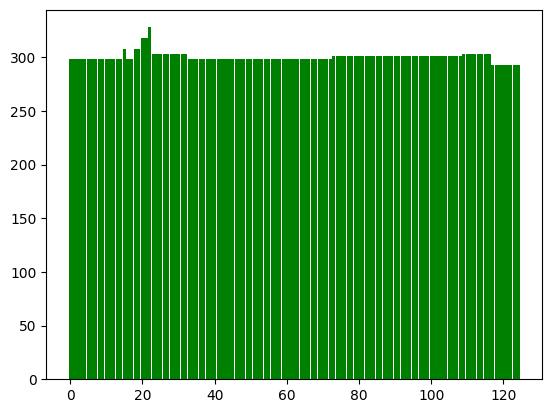

In [7]:
#plot - temperature
index = np.arange(len(temperature))
bar_width = 0.9
plt.bar(index, temperature, bar_width,  color="green")
plt.show()

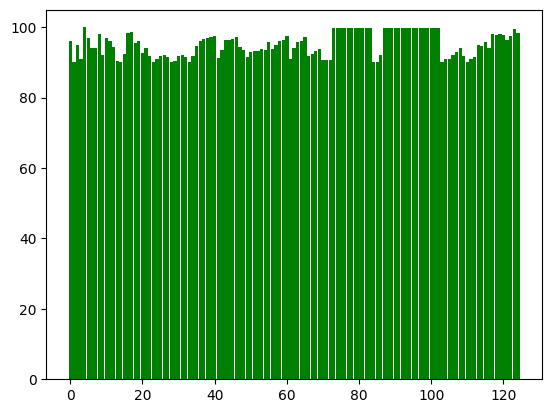

In [8]:
#plot - temperature
index = np.arange(len(efficiency))
bar_width = 0.9
plt.bar(index, efficiency, bar_width,  color="green")
plt.show()

## Parse smiles

In [9]:
# check if datamol-io is installed
!pip install datamol

Defaulting to user installation because normal site-packages is not writeable


In [10]:
import datamol as dm

In [11]:
avionic_dataset["Mol"] = avionic_dataset["Smiles"].apply(dm.to_mol)

In [12]:
avionic_dataset.head()

,Index,Inhibitor,Metal,Alloy,Temperature_K,pH,Salt_Concentration,Efficiency,Smiles,Mol
0,1,2-Mercaptoacetic acid,Al,AA2024,298,7,0.1,96.0,OC(=O)CS,<rdkit.Chem.rdchem.Mol object at 0x7f8944a92f10>
1,2,2-Mercaptobenzimidazole,Al,AA2024,298,7,0.1,90.0,Sc1nc2c([nH]1)cccc2,<rdkit.Chem.rdchem.Mol object at 0x7f8944a92f80>
2,3,"2-Mercaptobenzothiazole / MBT / 1,3-Benzothiaz...",Al,AA2024,298,7,0.1,95.0,S=c1sc2c([nH]1)cccc2,<rdkit.Chem.rdchem.Mol object at 0x7f8944a92ff0>
3,4,"2-Mercaptobenzothiazole / MBT / 1,3-Benzothiaz...",Al,AA7075,298,7,0.1,91.0,S=c1sc2c([nH]1)cccc2,<rdkit.Chem.rdchem.Mol object at 0x7f8944a93060>
4,5,3-Mercaptopropanoic acid,Al,AA2024,298,7,0.1,100.0,OC(=O)CCS,<rdkit.Chem.rdchem.Mol object at 0x7f8944a930d0>


In [13]:
avionic_dataset["Descriptors"] = avionic_dataset["Mol"].apply(dm.descriptors.compute_many_descriptors)
    

In [14]:
avionic_dataset.head()

,Index,Inhibitor,Metal,Alloy,Temperature_K,pH,Salt_Concentration,Efficiency,Smiles,Mol,Descriptors
0,1,2-Mercaptoacetic acid,Al,AA2024,298,7,0.1,96.0,OC(=O)CS,<rdkit.Chem.rdchem.Mol object at 0x7f8944a92f10>,"{'mw': 91.993200368, 'fsp3': 0.5, 'n_lipinski_..."
1,2,2-Mercaptobenzimidazole,Al,AA2024,298,7,0.1,90.0,Sc1nc2c([nH]1)cccc2,<rdkit.Chem.rdchem.Mol object at 0x7f8944a92f80>,"{'mw': 150.025169192, 'fsp3': 0.0, 'n_lipinski..."
2,3,"2-Mercaptobenzothiazole / MBT / 1,3-Benzothiaz...",Al,AA2024,298,7,0.1,95.0,S=c1sc2c([nH]1)cccc2,<rdkit.Chem.rdchem.Mol object at 0x7f8944a92ff0>,"{'mw': 166.98634116, 'fsp3': 0.0, 'n_lipinski_..."
3,4,"2-Mercaptobenzothiazole / MBT / 1,3-Benzothiaz...",Al,AA7075,298,7,0.1,91.0,S=c1sc2c([nH]1)cccc2,<rdkit.Chem.rdchem.Mol object at 0x7f8944a93060>,"{'mw': 166.98634116, 'fsp3': 0.0, 'n_lipinski_..."
4,5,3-Mercaptopropanoic acid,Al,AA2024,298,7,0.1,100.0,OC(=O)CCS,<rdkit.Chem.rdchem.Mol object at 0x7f8944a930d0>,"{'mw': 106.008850432, 'fsp3': 0.66666666666666..."


## get molecular weight and sort list

In [15]:
def get_mw(row):
    return row["mw"]

avionic_dataset["MW"] = avionic_dataset["Descriptors"].apply(get_mw)

In [16]:
avionic_dataset.head()

,Index,Inhibitor,Metal,Alloy,Temperature_K,pH,Salt_Concentration,Efficiency,Smiles,Mol,Descriptors,MW
0,1,2-Mercaptoacetic acid,Al,AA2024,298,7,0.1,96.0,OC(=O)CS,<rdkit.Chem.rdchem.Mol object at 0x7f8944a92f10>,"{'mw': 91.993200368, 'fsp3': 0.5, 'n_lipinski_...",91.993200
1,2,2-Mercaptobenzimidazole,Al,AA2024,298,7,0.1,90.0,Sc1nc2c([nH]1)cccc2,<rdkit.Chem.rdchem.Mol object at 0x7f8944a92f80>,"{'mw': 150.025169192, 'fsp3': 0.0, 'n_lipinski...",150.025169
2,3,"2-Mercaptobenzothiazole / MBT / 1,3-Benzothiaz...",Al,AA2024,298,7,0.1,95.0,S=c1sc2c([nH]1)cccc2,<rdkit.Chem.rdchem.Mol object at 0x7f8944a92ff0>,"{'mw': 166.98634116, 'fsp3': 0.0, 'n_lipinski_...",166.986341
3,4,"2-Mercaptobenzothiazole / MBT / 1,3-Benzothiaz...",Al,AA7075,298,7,0.1,91.0,S=c1sc2c([nH]1)cccc2,<rdkit.Chem.rdchem.Mol object at 0x7f8944a93060>,"{'mw': 166.98634116, 'fsp3': 0.0, 'n_lipinski_...",166.986341
4,5,3-Mercaptopropanoic acid,Al,AA2024,298,7,0.1,100.0,OC(=O)CCS,<rdkit.Chem.rdchem.Mol object at 0x7f8944a930d0>,"{'mw': 106.008850432, 'fsp3': 0.66666666666666...",106.008850


In [17]:
# now sort it from lowest to highest
avionic_dataset.sort_values(by="MW", ascending=True)

,Index,Inhibitor,Metal,Alloy,Temperature_K,pH,Salt_Concentration,Efficiency,Smiles,Mol,Descriptors,MW
0,1,2-Mercaptoacetic acid,Al,AA2024,298,7,0.10,96.00,OC(=O)CS,<rdkit.Chem.rdchem.Mol object at 0x7f8944a92f10>,"{'mw': 91.993200368, 'fsp3': 0.5, 'n_lipinski_...",91.993200
4,5,3-Mercaptopropanoic acid,Al,AA2024,298,7,0.10,100.00,OC(=O)CCS,<rdkit.Chem.rdchem.Mol object at 0x7f8944a930d0>,"{'mw': 106.008850432, 'fsp3': 0.66666666666666...",106.008850
118,119,Benzotriazole,Al,AA2024,293,7,0.05,97.80,c1ccc2c(c1)[nH]nn2,<rdkit.Chem.rdchem.Mol object at 0x7f8944a7e340>,"{'mw': 119.04834715999999, 'fsp3': 0.0, 'n_lip...",119.048347
8,9,Benzotriazole,Al,AA2024,298,7,0.10,98.00,c1ccc2c(c1)[nH]nn2,<rdkit.Chem.rdchem.Mol object at 0x7f8944a93290>,"{'mw': 119.04834715999999, 'fsp3': 0.0, 'n_lip...",119.048347
9,10,Benzotriazole,Al,AA7075,298,7,0.10,92.00,c1ccc2c(c1)[nH]nn2,<rdkit.Chem.rdchem.Mol object at 0x7f8944a93300>,"{'mw': 119.04834715999999, 'fsp3': 0.0, 'n_lip...",119.048347
117,118,Benzotriazole,Al,AA2024,293,7,0.05,98.10,c1ccc2c(c1)[nH]nn2,<rdkit.Chem.rdchem.Mol object at 0x7f8944a7e2d0>,"{'mw': 119.04834715999999, 'fsp3': 0.0, 'n_lip...",119.048347
18,19,Sodium sulfite,Al,AA2024,308,7,0.60,95.50,[O-]S(=O)[O-].[Na+].[Na+],<rdkit.Chem.rdchem.Mol object at 0x7f8944a936f0>,"{'mw': 125.93635342, 'fsp3': 0.0, 'n_lipinski_...",125.936353
17,18,Sodium sulfite,Al,AA2024,298,7,0.60,98.70,[O-]S(=O)[O-].[Na+].[Na+],<rdkit.Chem.rdchem.Mol object at 0x7f8944a93680>,"{'mw': 125.93635342, 'fsp3': 0.0, 'n_lipinski_...",125.936353
16,17,Sodium sulfite,Al,AA2024,298,7,0.60,98.50,[O-]S(=O)[O-].[Na+].[Na+],<rdkit.Chem.rdchem.Mol object at 0x7f8944a93610>,"{'mw': 125.93635342, 'fsp3': 0.0, 'n_lipinski_...",125.936353
21,22,Sodium sulfite,Al,AA2024,318,7,0.60,94.00,[O-]S(=O)[O-].[Na+].[Na+],<rdkit.Chem.rdchem.Mol object at 0x7f8944a93840>,"{'mw': 125.93635342, 'fsp3': 0.0, 'n_lipinski_...",125.936353


## Automotive Dataset

In [18]:
# read in file
# Load the dictionary 
automotive_dataset = pd.read_excel('../../inhibitors/CORDATA/automotive_dataset.xlsx') 

print(automotive_dataset.shape)
print(automotive_dataset.columns)
description = automotive_dataset.describe()

(126, 9)
Index(['Index', 'Inhibitor', 'Metal', 'Alloy', 'Temperature_K', 'pH',
       'Salt_Concentration', 'Efficiency', 'Smiles'],
      dtype='object')


In [19]:
import datamol as dm

In [20]:
automotive_dataset["Mol"] = automotive_dataset["Smiles"].apply(dm.to_mol)

In [21]:
automotive_dataset["Descriptors"] = automotive_dataset["Mol"].apply(dm.descriptors.compute_many_descriptors)

In [22]:
def get_mw(row):
    return row["mw"]

automotive_dataset["MW"] = automotive_dataset["Descriptors"].apply(get_mw)

In [23]:
# now sort it from lowest to highest
automotive_dataset.sort_values(by="MW", ascending=True)

,Index,Inhibitor,Metal,Alloy,Temperature_K,pH,Salt_Concentration,Efficiency,Smiles,Mol,Descriptors,MW
0,1,2-Mercaptoacetic acid,Al,AA2024,298,7,0.10,96.00,OC(=O)CS,<rdkit.Chem.rdchem.Mol object at 0x7f893ed9f8b0>,"{'mw': 91.993200368, 'fsp3': 0.5, 'n_lipinski_...",91.993200
4,5,3-Mercaptopropanoic acid,Al,AA2024,298,7,0.10,100.00,OC(=O)CCS,<rdkit.Chem.rdchem.Mol object at 0x7f893ed9f450>,"{'mw': 106.008850432, 'fsp3': 0.66666666666666...",106.008850
119,119,Benzotriazole,Al,AA2024,293,7,0.05,97.80,c1ccc2c(c1)[nH]nn2,<rdkit.Chem.rdchem.Mol object at 0x7f893ccd69d0>,"{'mw': 119.04834715999999, 'fsp3': 0.0, 'n_lip...",119.048347
8,9,Benzotriazole,Al,AA2024,298,7,0.10,98.00,c1ccc2c(c1)[nH]nn2,<rdkit.Chem.rdchem.Mol object at 0x7f893ed9fed0>,"{'mw': 119.04834715999999, 'fsp3': 0.0, 'n_lip...",119.048347
9,10,Benzotriazole,Al,AA7075,298,7,0.10,92.00,c1ccc2c(c1)[nH]nn2,<rdkit.Chem.rdchem.Mol object at 0x7f893ed9f060>,"{'mw': 119.04834715999999, 'fsp3': 0.0, 'n_lip...",119.048347
118,118,Benzotriazole,Al,AA2024,293,7,0.05,98.10,c1ccc2c(c1)[nH]nn2,<rdkit.Chem.rdchem.Mol object at 0x7f893ccd6960>,"{'mw': 119.04834715999999, 'fsp3': 0.0, 'n_lip...",119.048347
18,19,Sodium sulfite,Al,AA2024,308,7,0.60,95.50,[O-]S(=O)[O-].[Na+].[Na+],<rdkit.Chem.rdchem.Mol object at 0x7f893ed9f6f0>,"{'mw': 125.93635342, 'fsp3': 0.0, 'n_lipinski_...",125.936353
17,18,Sodium sulfite,Al,AA2024,298,7,0.60,98.70,[O-]S(=O)[O-].[Na+].[Na+],<rdkit.Chem.rdchem.Mol object at 0x7f893ed9ef80>,"{'mw': 125.93635342, 'fsp3': 0.0, 'n_lipinski_...",125.936353
16,17,Sodium sulfite,Al,AA2024,298,7,0.60,98.50,[O-]S(=O)[O-].[Na+].[Na+],<rdkit.Chem.rdchem.Mol object at 0x7f893ed9f760>,"{'mw': 125.93635342, 'fsp3': 0.0, 'n_lipinski_...",125.936353
21,22,Sodium sulfite,Al,AA2024,318,7,0.60,94.00,[O-]S(=O)[O-].[Na+].[Na+],<rdkit.Chem.rdchem.Mol object at 0x7f893ccd7ed0>,"{'mw': 125.93635342, 'fsp3': 0.0, 'n_lipinski_...",125.936353
